In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


import os
print(os.listdir("/users/raunakchhabra/54339-104884-bundle-archive"))


['hmnist_28_28_L.csv', 'hmnist_28_28_RGB.csv', 'HAM10000_images_part_1', 'hmnist_8_8_RGB.csv', 'hmnist_8_8_L.csv', 'HAM10000_images_part_2', 'HAM10000_metadata.csv']


In [13]:
data = pd.read_csv("/users/raunakchhabra/54339-104884-bundle-archive/HAM10000_metadata.csv")

In [14]:
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [15]:
data.tail()

,lesion_id,image_id,dx,dx_type,age,sex,localization
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face
10014,HAM_0003521,ISIC_0032258,mel,histo,70.0,female,back


In [16]:
data.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


In [17]:
data.sex = [1 if each == 'female' else 0 for each in data.sex]

In [18]:
data.tail()

,lesion_id,image_id,dx,dx_type,age,sex,localization
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,0,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,0,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,0,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,0,face
10014,HAM_0003521,ISIC_0032258,mel,histo,70.0,1,back


In [19]:
image = pd.read_csv("/users/raunakchhabra/54339-104884-bundle-archive/hmnist_28_28_L.csv")

In [20]:
image.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
0,169,171,170,177,181,182,181,185,194,192,...,184,186,185,180,157,140,140,159,165,2
1,19,57,105,140,149,148,144,155,170,170,...,172,175,160,144,114,89,47,18,18,2
2,155,163,161,167,167,172,155,152,165,175,...,163,178,157,166,167,148,141,136,115,2
3,25,71,116,139,136,153,148,161,172,162,...,125,135,138,137,111,71,32,16,16,2
4,129,162,181,196,205,208,205,213,225,224,...,210,197,172,190,195,193,181,147,88,2


In [21]:
data.dx = [1 if each == 'bkl' or each == 'nv' or each == 'df' else 0 for each in data.dx]

In [22]:
data.dx

0        1
1        1
2        1
3        1
4        1
        ..
10010    0
10011    0
10012    0
10013    0
10014    0
Name: dx, Length: 10015, dtype: int64

In [23]:
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,1,histo,80.0,0,scalp
1,HAM_0000118,ISIC_0025030,1,histo,80.0,0,scalp
2,HAM_0002730,ISIC_0026769,1,histo,80.0,0,scalp
3,HAM_0002730,ISIC_0025661,1,histo,80.0,0,scalp
4,HAM_0001466,ISIC_0031633,1,histo,75.0,0,ear


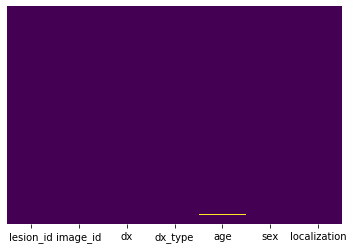

In [24]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
data['age'].dropna()

0        80.0
1        80.0
2        80.0
3        80.0
4        75.0
         ... 
10010    40.0
10011    40.0
10012    40.0
10013    80.0
10014    70.0
Name: age, Length: 9958, dtype: float64

In [26]:
data = data.dropna()

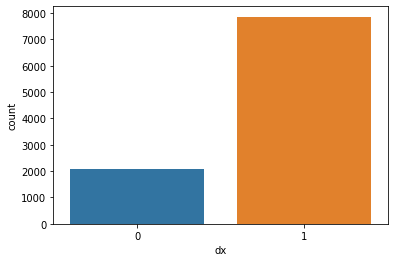

In [30]:
sns.countplot(x='dx',data=data)
plt.show()

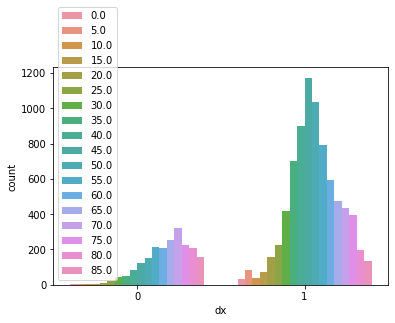

In [29]:
sns.countplot(x='dx',hue='age',data=data)
plt.legend(loc='best')
plt.show()

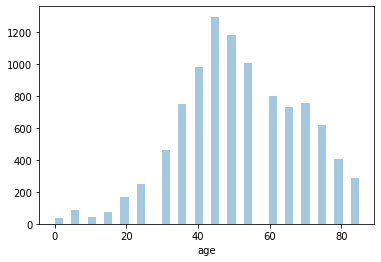

In [31]:
sns.distplot(data['age'].dropna(),kde=False)

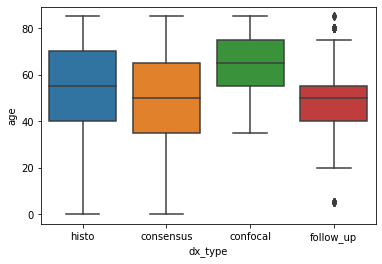

In [33]:
sns.boxplot(x='dx_type', y='age', data=data)

In [34]:
data['localization'] = pd.Categorical(data['localization'])

In [35]:
new_categ_df = pd.get_dummies(data['localization'],prefix ='local')

In [36]:
new_data_frame = pd.concat([data,new_categ_df],axis=1)

In [37]:
new_data_frame.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,local_abdomen,local_acral,local_back,...,local_face,local_foot,local_genital,local_hand,local_lower extremity,local_neck,local_scalp,local_trunk,local_unknown,local_upper extremity
0,HAM_0000118,ISIC_0027419,1,histo,80.0,0,scalp,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,HAM_0000118,ISIC_0025030,1,histo,80.0,0,scalp,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,HAM_0002730,ISIC_0026769,1,histo,80.0,0,scalp,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,HAM_0002730,ISIC_0025661,1,histo,80.0,0,scalp,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,HAM_0001466,ISIC_0031633,1,histo,75.0,0,ear,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
data = new_data_frame

In [39]:
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,local_abdomen,local_acral,local_back,...,local_face,local_foot,local_genital,local_hand,local_lower extremity,local_neck,local_scalp,local_trunk,local_unknown,local_upper extremity
0,HAM_0000118,ISIC_0027419,1,histo,80.0,0,scalp,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,HAM_0000118,ISIC_0025030,1,histo,80.0,0,scalp,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,HAM_0002730,ISIC_0026769,1,histo,80.0,0,scalp,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,HAM_0002730,ISIC_0025661,1,histo,80.0,0,scalp,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,HAM_0001466,ISIC_0031633,1,histo,75.0,0,ear,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
new_data_frame['dx_type'] = pd.Categorical(new_data_frame['dx_type'])

In [41]:
new_categ_df = pd.get_dummies(new_data_frame['dx_type'],prefix ='dx_type')

In [42]:
new_data =  pd.concat([new_data_frame,new_categ_df],axis=1)

In [43]:
new_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,local_abdomen,local_acral,local_back,...,local_lower extremity,local_neck,local_scalp,local_trunk,local_unknown,local_upper extremity,dx_type_confocal,dx_type_consensus,dx_type_follow_up,dx_type_histo
0,HAM_0000118,ISIC_0027419,1,histo,80.0,0,scalp,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,HAM_0000118,ISIC_0025030,1,histo,80.0,0,scalp,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,HAM_0002730,ISIC_0026769,1,histo,80.0,0,scalp,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,HAM_0002730,ISIC_0025661,1,histo,80.0,0,scalp,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,HAM_0001466,ISIC_0031633,1,histo,75.0,0,ear,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
new_data_frame = pd.concat([data,new_categ_df],axis=1)

In [45]:
data = new_data_frame

In [46]:
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,local_abdomen,local_acral,local_back,...,local_lower extremity,local_neck,local_scalp,local_trunk,local_unknown,local_upper extremity,dx_type_confocal,dx_type_consensus,dx_type_follow_up,dx_type_histo
0,HAM_0000118,ISIC_0027419,1,histo,80.0,0,scalp,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,HAM_0000118,ISIC_0025030,1,histo,80.0,0,scalp,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,HAM_0002730,ISIC_0026769,1,histo,80.0,0,scalp,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,HAM_0002730,ISIC_0025661,1,histo,80.0,0,scalp,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,HAM_0001466,ISIC_0031633,1,histo,75.0,0,ear,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
data = data.drop(['localization','lesion_id','image_id','dx_type'],axis=1)

In [48]:
data.head()

,dx,age,sex,local_abdomen,local_acral,local_back,local_chest,local_ear,local_face,local_foot,...,local_lower extremity,local_neck,local_scalp,local_trunk,local_unknown,local_upper extremity,dx_type_confocal,dx_type_consensus,dx_type_follow_up,dx_type_histo
0,1,80.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,80.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,80.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,80.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1,75.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
x = data.drop('dx',axis=1)
y = data['dx']

In [50]:
#Logistic Regression
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logmodel = LogisticRegression()

In [54]:
logmodel.fit(x_train,y_train)

/Users/raunakchhabra/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
predictions = logmodel.predict(x_test)

In [56]:
from sklearn.metrics import classification_report

In [57]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.54      0.41      0.46       632
           1       0.85      0.91      0.88      2356

    accuracy                           0.80      2988
   macro avg       0.70      0.66      0.67      2988
weighted avg       0.79      0.80      0.79      2988



In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
confusion_matrix(y_test,predictions)

array([[ 257,  375],
       [ 217, 2139]])

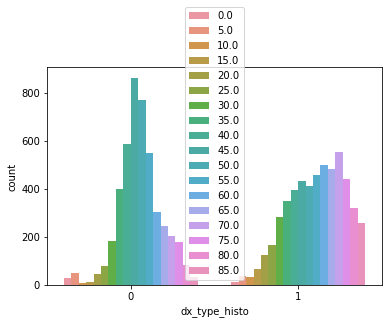

In [60]:
sns.countplot(x='dx_type_histo',hue='age',data=data)
plt.legend(loc='best')
plt.show()

In [61]:
#KNN
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()

In [63]:
scaler.fit(data.drop('dx',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [64]:
scaled_features = scaler.transform(data.drop('dx',axis=1))

In [65]:
scaled_features

array([[ 1.65821353, -0.91687809, -0.33800023, ..., -0.30607971,
        -0.76958492,  0.93144613],
       [ 1.65821353, -0.91687809, -0.33800023, ..., -0.30607971,
        -0.76958492,  0.93144613],
       [ 1.65821353, -0.91687809, -0.33800023, ..., -0.30607971,
        -0.76958492,  0.93144613],
       ...,
       [-0.69919818, -0.91687809,  2.95857789, ..., -0.30607971,
        -0.76958492,  0.93144613],
       [ 1.65821353, -0.91687809, -0.33800023, ..., -0.30607971,
        -0.76958492,  0.93144613],
       [ 1.0688606 ,  1.09065754, -0.33800023, ..., -0.30607971,
        -0.76958492,  0.93144613]])

In [66]:
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])

In [67]:
df_feat.head()

,dx,age,sex,local_abdomen,local_acral,local_back,local_chest,local_ear,local_face,local_foot,...,local_hand,local_lower extremity,local_neck,local_scalp,local_trunk,local_unknown,local_upper extremity,dx_type_confocal,dx_type_consensus,dx_type_follow_up
0,1.658214,-0.916878,-0.338,-0.026523,-0.531278,-0.205901,-0.075203,-0.283953,-0.18133,-0.069596,...,-0.513367,-0.130998,8.763383,-0.404966,-0.138341,-0.355269,-0.083531,-0.30608,-0.769585,0.931446
1,1.658214,-0.916878,-0.338,-0.026523,-0.531278,-0.205901,-0.075203,-0.283953,-0.18133,-0.069596,...,-0.513367,-0.130998,8.763383,-0.404966,-0.138341,-0.355269,-0.083531,-0.30608,-0.769585,0.931446
2,1.658214,-0.916878,-0.338,-0.026523,-0.531278,-0.205901,-0.075203,-0.283953,-0.18133,-0.069596,...,-0.513367,-0.130998,8.763383,-0.404966,-0.138341,-0.355269,-0.083531,-0.30608,-0.769585,0.931446
3,1.658214,-0.916878,-0.338,-0.026523,-0.531278,-0.205901,-0.075203,-0.283953,-0.18133,-0.069596,...,-0.513367,-0.130998,8.763383,-0.404966,-0.138341,-0.355269,-0.083531,-0.30608,-0.769585,0.931446
4,1.363537,-0.916878,-0.338,-0.026523,-0.531278,-0.205901,13.297422,-0.283953,-0.18133,-0.069596,...,-0.513367,-0.130998,-0.114111,-0.404966,-0.138341,-0.355269,-0.083531,-0.30608,-0.769585,0.931446


In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x = df_feat
y = data['dx']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn = KNeighborsClassifier(n_neighbors=3)

In [72]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [73]:
pred = knn.predict(x_test)


In [74]:
pred

array([0, 1, 1, ..., 1, 0, 1])

In [75]:
from sklearn.metrics import classification_report,confusion_matrix

In [76]:
print(confusion_matrix(y_test,pred))

[[ 311  321]
 [ 319 2037]]


In [77]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.49      0.49      0.49       632
           1       0.86      0.86      0.86      2356

    accuracy                           0.79      2988
   macro avg       0.68      0.68      0.68      2988
weighted avg       0.79      0.79      0.79      2988



In [78]:
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

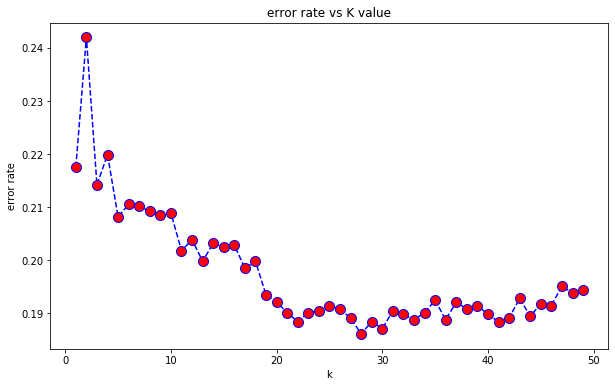

In [80]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('error rate vs K value')
plt.xlabel('k')
plt.ylabel('error rate')
plt.show()

In [81]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[ 294  338]
 [ 284 2072]]


              precision    recall  f1-score   support

           0       0.51      0.47      0.49       632
           1       0.86      0.88      0.87      2356

    accuracy                           0.79      2988
   macro avg       0.68      0.67      0.68      2988
weighted avg       0.79      0.79      0.79      2988



In [82]:
from sklearn.svm import SVC

In [83]:
model = SVC()

In [84]:
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [85]:
predictions = model.predict(x_test)

In [86]:
from sklearn.metrics import classification_report,confusion_matrix

In [87]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 179  453]
 [ 156 2200]]


              precision    recall  f1-score   support

           0       0.53      0.28      0.37       632
           1       0.83      0.93      0.88      2356

    accuracy                           0.80      2988
   macro avg       0.68      0.61      0.62      2988
weighted avg       0.77      0.80      0.77      2988



In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
param_grid = {'C': [0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}

In [90]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [91]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=0.1, gamma=1, score=0.816, total=   0.8s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.808, total=   0.8s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.816, total=   0.8s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.806, total=   0.8s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.803, total=   0.8s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.816, total=   0.7s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.814, total=   0.7s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.808, total=   0.7s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.803, total=   0.7s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] .................... C=10, gamma=0.01, score=0.821, total=   0.7s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.816, total=   0.7s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.809, total=   0.8s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.806, total=   0.7s
[CV] C=10, gamma=0.01 ................................................
[CV] .................... C=10, gamma=0.01, score=0.807, total=   0.7s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.819, total=   0.7s
[CV] C=10, gamma=0.001 ...............................................
[CV] ................... C=10, gamma=0.001, score=0.812, total=   0.7s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[CV] ................. C=1000, gamma=0.001, score=0.804, total=   1.6s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.810, total=   0.9s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.831, total=   0.7s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.811, total=   0.7s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.812, total=   0.7s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.807, total=   0.7s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.808, total=   0.7s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  4.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [92]:
grid.best_params_

{'C': 100, 'gamma': 0.1}

In [93]:
grid.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [94]:
grid_predictions = grid.predict(x_test)

In [95]:
grid_predictions

array([0, 1, 1, ..., 1, 0, 1])

In [96]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[ 239  393]
 [ 193 2163]]


              precision    recall  f1-score   support

           0       0.55      0.38      0.45       632
           1       0.85      0.92      0.88      2356

    accuracy                           0.80      2988
   macro avg       0.70      0.65      0.66      2988
weighted avg       0.78      0.80      0.79      2988



In [97]:
data.head()

,dx,age,sex,local_abdomen,local_acral,local_back,local_chest,local_ear,local_face,local_foot,...,local_lower extremity,local_neck,local_scalp,local_trunk,local_unknown,local_upper extremity,dx_type_confocal,dx_type_consensus,dx_type_follow_up,dx_type_histo
0,1,80.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,80.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,80.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,80.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1,75.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


[]

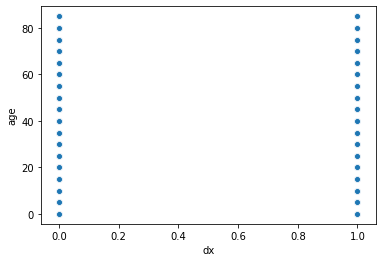

In [98]:
sns.scatterplot(x='dx',y='age',data=data)
plt.plot()